In [1]:
library(Seurat)
library(limma)
library(ggplot2)
library(patchwork)
library(edgeR)
library(statmod)
library(speckle)
library(ggpubr)
library(ggrepel)
library(dplyr)

Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.3.2”
Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.3.2”

Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Warning message:
“package ‘limma’ was built under R version 4.3.2”
Warning message:
“package ‘patchwork’ was built under R version 4.3.2”
Warning message:
“package ‘ggpubr’ was built under R version 4.3.2”
Warning message:
“package ‘ggrepel’ was built under R version 4.3.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Computing nearest neighbor graph

Computing SNN



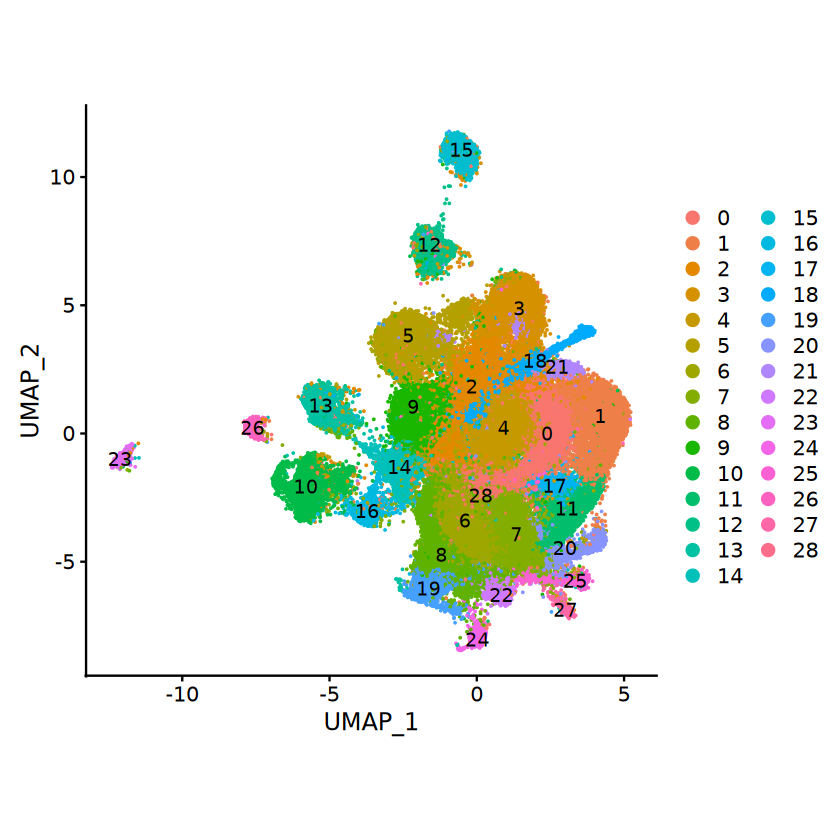

In [2]:
data <- readRDS("/data/Zhang,labShare/Nhlh2_progject/Nhlh2.neuron.v2.91479cells.rds")
data <- FindNeighbors(data,dims = 1:40)
data <- FindClusters(object = data, resolution = 0.8,verbose = FALSE)
DimPlot(data,label = T)+theme(aspect.ratio = 1)

In [3]:
female <- subset(data, sex=="Female")

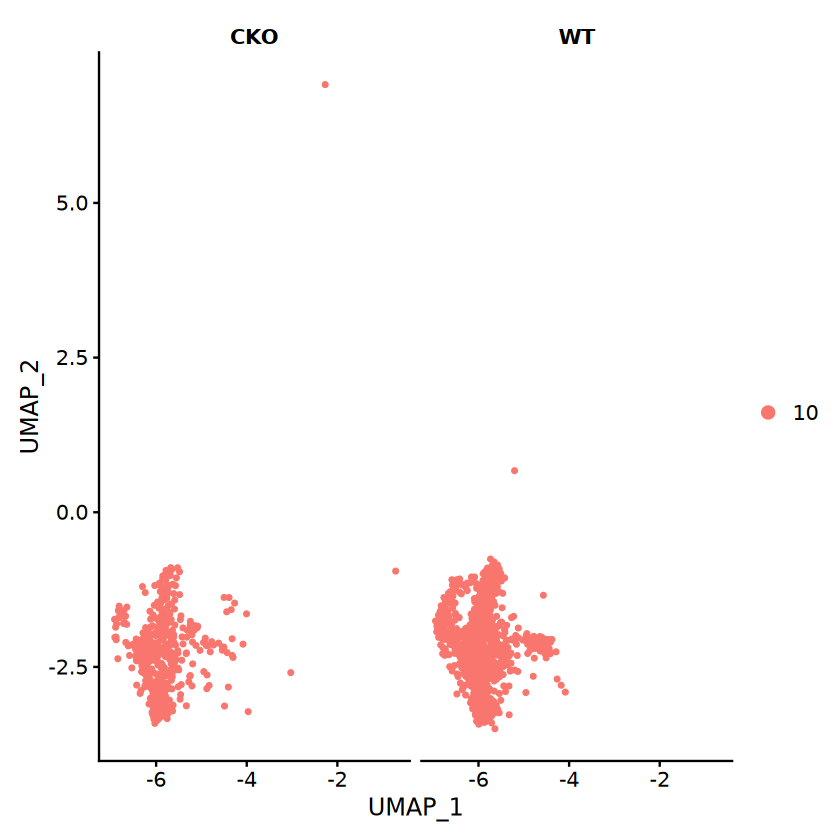

In [4]:
female_subset = subset(female,integrated_snn_res.0.8==c(10))
DimPlot(female_subset,split.by = 'treatment')

In [29]:
female_subset = FindVariableFeatures(female_subset)

Warning message in FindVariableFeatures.Assay(object = object[[assay]], selection.method = selection.method, :
“selection.method set to 'vst' but count slot is empty; will use data slot instead”
Warning message in eval(predvars, data, env):
“NaNs produced”
Warning message in hvf.info$variance.expected[not.const] <- 10^fit$fitted:
“number of items to replace is not a multiple of replacement length”


In [30]:
Idents(female_subset)=female_subset$treatment
female_markers = FindMarkers(female_subset,ident.1 = 'CKO',ident.2 = 'WT')

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
“NaNs produced”
Warning message in mean.fxn(object[features, cells.2, drop = FALSE]):
“NaNs produced”


In [31]:
#阈值确定：
Pvalue = 0.05
log2FC = 0.5
# 确定上下调表达基因
female_markers$Group = as.factor(ifelse(female_markers$p_val_adj < Pvalue & abs(female_markers$avg_log2FC) > log2FC,
                                      ifelse(female_markers$avg_log2FC > log2FC ,'Up','Down'),'Stable'))
table(female_markers$Group)

female_markers$Group <- factor(female_markers$Group, levels = c("Up","Stable","Down"))
female_markers


  Down Stable     Up 
    57   1356    136 

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,Group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Catip,7.444424e-84,1.7414231,0.177,0.602,1.488885e-80,Up
Mgp,1.436705e-73,0.8237078,0.378,0.776,2.873410e-70,Up
Nek5,1.304859e-65,0.1890586,0.644,0.942,2.609719e-62,Stable
8430426J06Rik,7.637995e-63,-2.7488107,0.362,0.724,1.527599e-59,Down
Prn,5.400809e-54,-0.5042305,0.238,0.569,1.080162e-50,Down
Gm8251,3.408959e-52,0.3206602,0.659,0.910,6.817918e-49,Stable
Pomc,1.613294e-50,-0.3733460,0.949,0.997,3.226587e-47,Stable
Gm33981,1.832675e-46,-2.0548635,0.488,0.833,3.665350e-43,Down
Crh,1.038412e-45,2.0445543,0.431,0.761,2.076824e-42,Up


In [32]:
female_markers$Symbol <- rownames(female_markers)
#分别筛选上下调中显著性top5，作为本次测试需要添加的目标标签：
Up <- filter(female_markers, Group == 'Up') %>% distinct(Symbol, .keep_all = T) %>% top_n(5, -log10(p_val_adj))
Down <- filter(female_markers, Group == 'Down') %>% distinct(Symbol, .keep_all = T) %>% top_n(5, -log10(p_val_adj))
head(Up);head(Down)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,Group,Symbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Catip,7.444424e-84,1.7414231,0.177,0.602,1.488885e-80,Up,Catip
Mgp,1.436705e-73,0.8237078,0.378,0.776,2.873410e-70,Up,Mgp
Crh,1.038412e-45,2.0445543,0.431,0.761,2.076824e-42,Up,Crh
Fsd2,9.769566e-39,4.4832960,0.827,0.525,1.953913e-35,Up,Fsd2
Nms,6.516309e-37,2.8180782,0.346,0.559,1.303262e-33,Up,Nms


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,Group,Symbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
8430426J06Rik,7.637995e-63,-2.7488107,0.362,0.724,1.527599e-59,Down,8430426J06Rik
Prn,5.400809e-54,-0.5042305,0.238,0.569,1.080162e-50,Down,Prn
Gm33981,1.832675e-46,-2.0548635,0.488,0.833,3.665350e-43,Down,Gm33981
Gm16201,2.474812e-40,-0.5855833,0.581,0.854,4.949624e-37,Down,Gm16201
Serpine1,5.063654e-38,-1.0099730,0.398,0.640,1.012731e-34,Down,Serpine1


In [33]:
mytheme <- theme_bw() + 
  theme(legend.key = element_rect(fill = 'transparent'), 
        legend.background = element_rect(fill = 'transparent'), 
        legend.position = c(0.15, 0.9),
        legend.title = element_blank(),
        legend.text = element_text(size = 20,margin = margin(t = 6)), 
        axis.text.x = element_text(hjust = 0.5,size = 18), 
        axis.text.y = element_text(size = 18), 
        axis.title.x = element_text(size = 20), 
        axis.title.y = element_text(size = 20), 
        axis.line = element_line(size = 1),
        plot.title = element_text(size = 24, hjust = 0.5))

Warning message:
“Duplicated aesthetics after name standardisation: size”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_text_repel()`).”


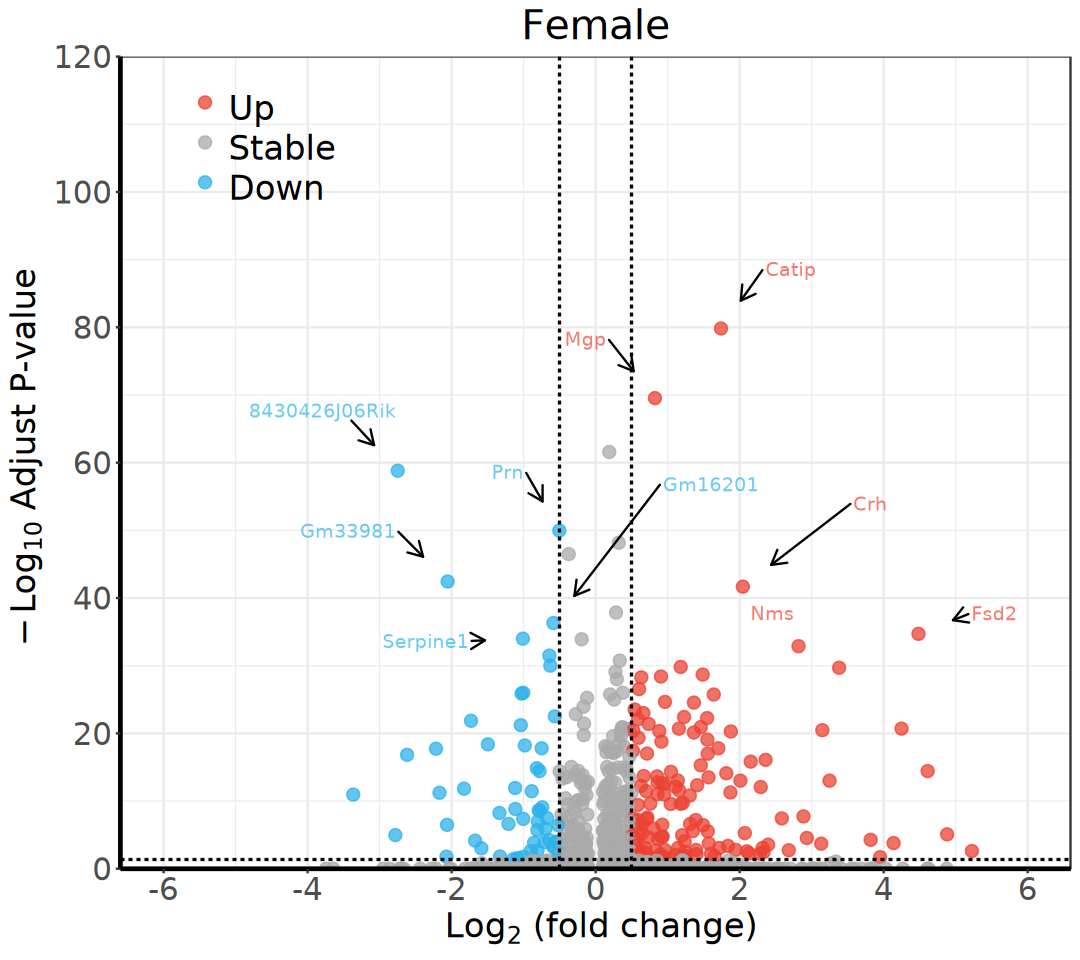

In [34]:
gene_show <- c(rownames(Up),rownames(Down))
female_markers$label <- ifelse(rownames(female_markers) %in% gene_show, rownames(female_markers), '')

volcano = ggplot(female_markers, aes(x=avg_log2FC, y=-log10(p_val_adj),color = Group)) +
  geom_point(alpha = 0.75, size = 3) +
  labs(x = bquote(~Log[2]~"(fold change)"), 
       y = bquote(~-Log[10]~italic("Adjust P-value")), 
       title = "Female") +
  geom_text_repel(aes(x = avg_log2FC,y = -log10(p_val_adj),label = label),size = 4,
                  box.padding = unit(2,"lines"),point.padding = unit(3,"lines"),
                  segment.color = "black",show.legend = F,
                  min.segment.length = 0,#始终为标签添加指引线段；若不想添加线段，则改为Inf
                  segment.linetype = 1, #线段类型,1为实线,2-6为不同类型虚线
                  force = 10,#重叠标签间的排斥力
                  force_pull = 2,#标签和数据点间的吸引力
                  size = 8,
                  max.overlaps = Inf,
                  arrow = arrow(length = unit(0.02, "npc"),type = "open", ends = "last"))+
  #scale_colour_manual( values = c('red','gray','blue') )+
  scale_colour_manual(name = "", values = alpha(c("#EB4232","darkgrey","#2DB2EB"), 0.7)) + 
  scale_x_continuous(limits = c(-6, 6),breaks = seq(-6, 6, by = 2)) + 
  scale_y_continuous(expand = expansion(add = c(0, 0)),limits = c(0, 120),breaks = seq(0, 120, by = 20)) + 
  geom_hline(yintercept = c(-log10(Pvalue)),size = 0.7,color = "black",lty = "dashed") + 
  geom_vline(xintercept = c(-log2FC, log2FC),size = 0.7,color = "black",lty = "dashed")+
  mytheme
options(repr.plot.width=9, repr.plot.height=8)
volcano

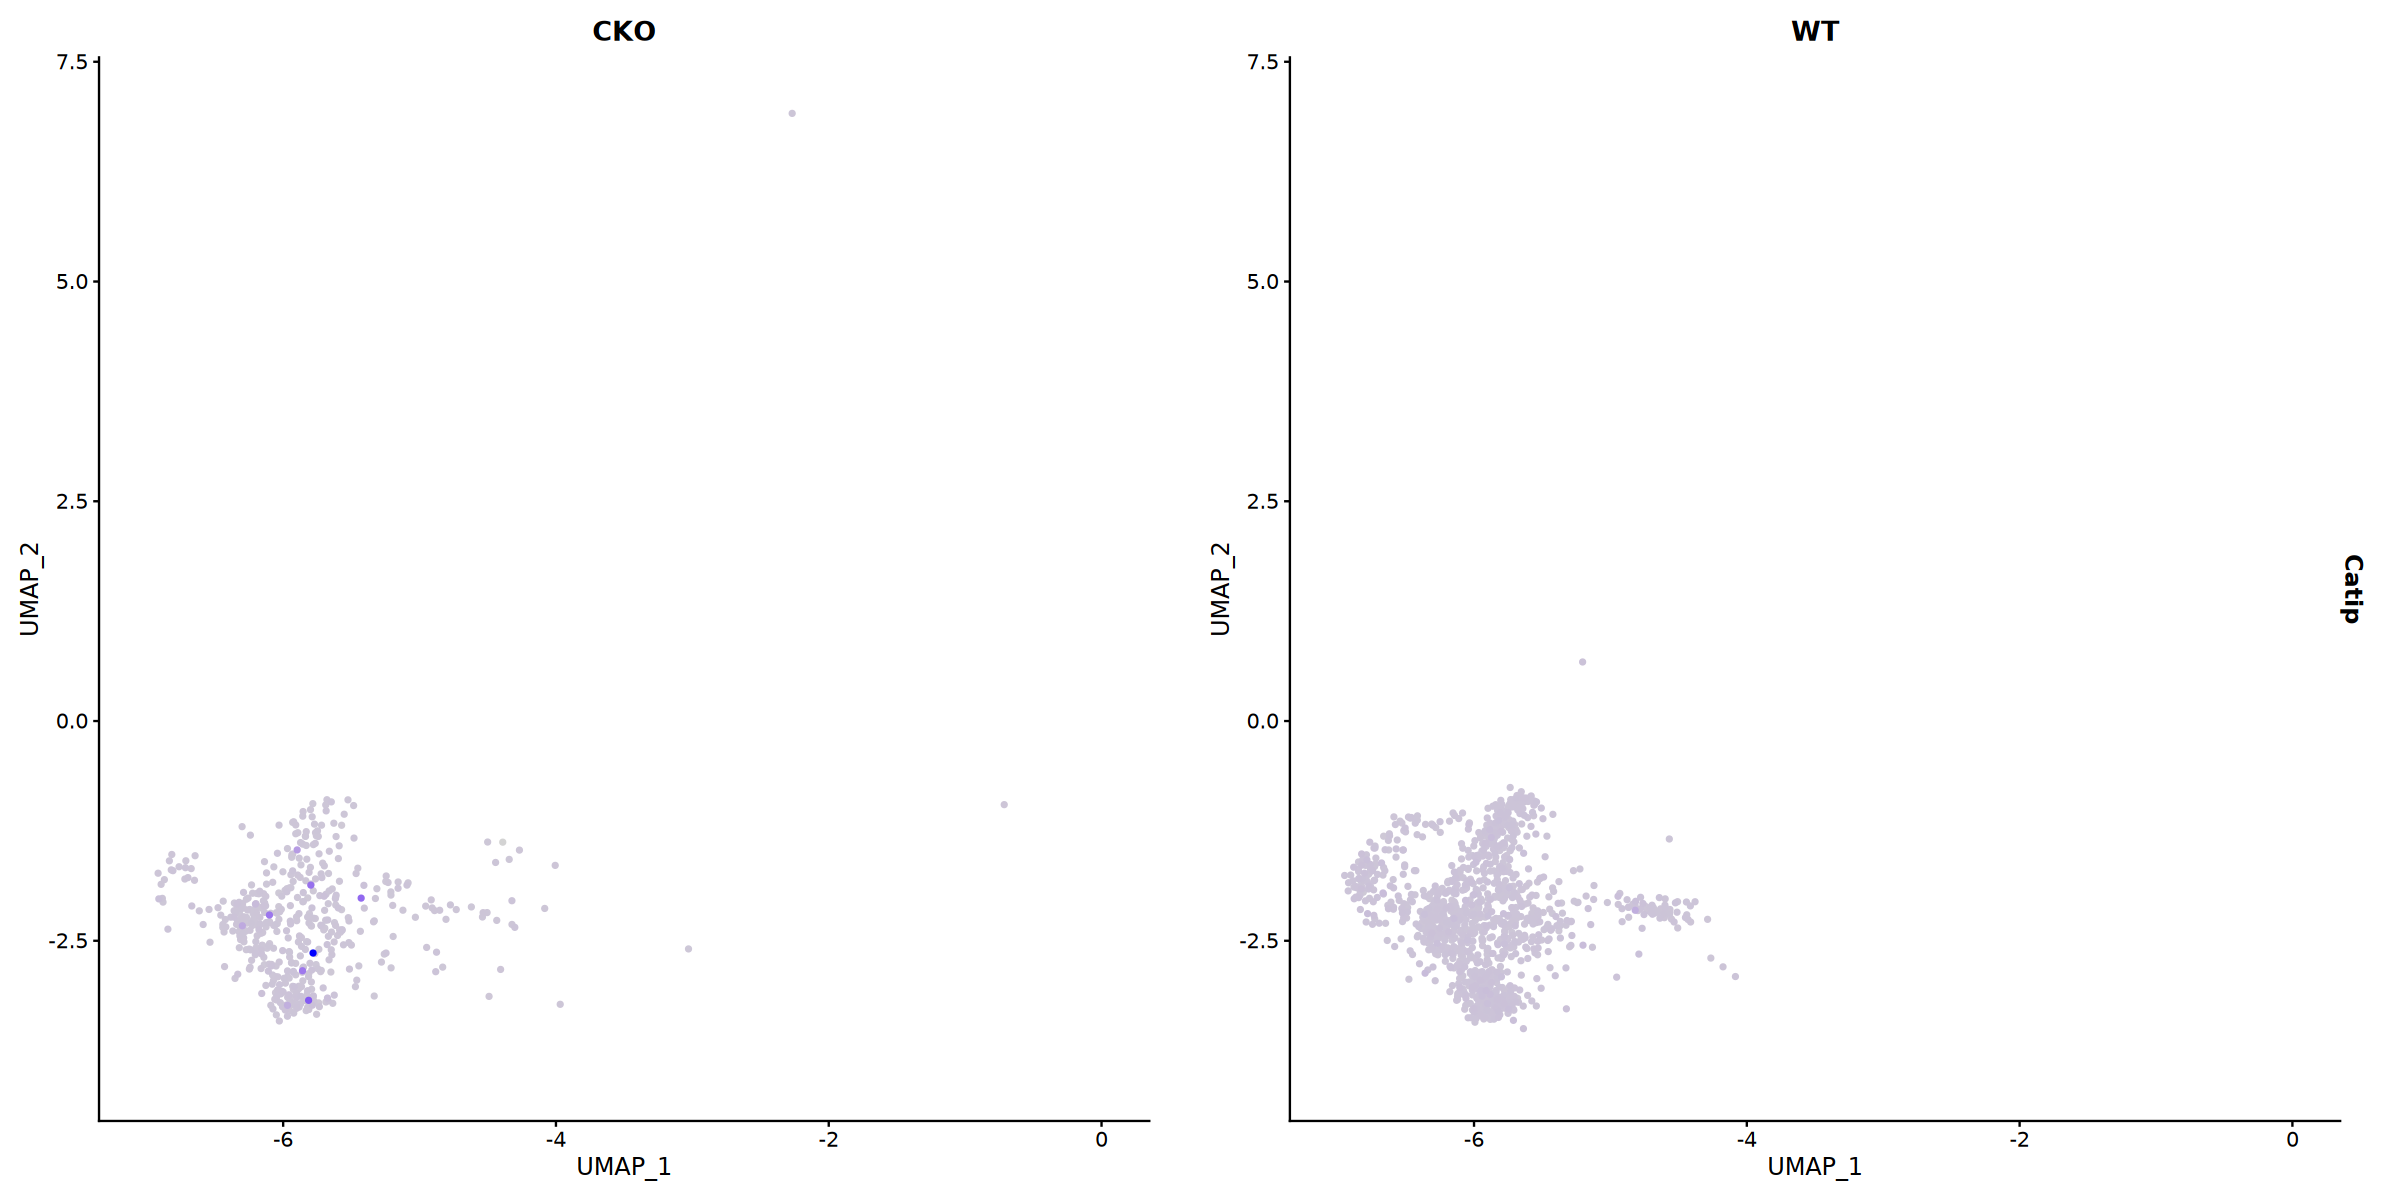

In [37]:
options(repr.plot.width=20, repr.plot.height=10)
FeaturePlot(female_subset,features = 'Catip',split.by='treatment',order=T)

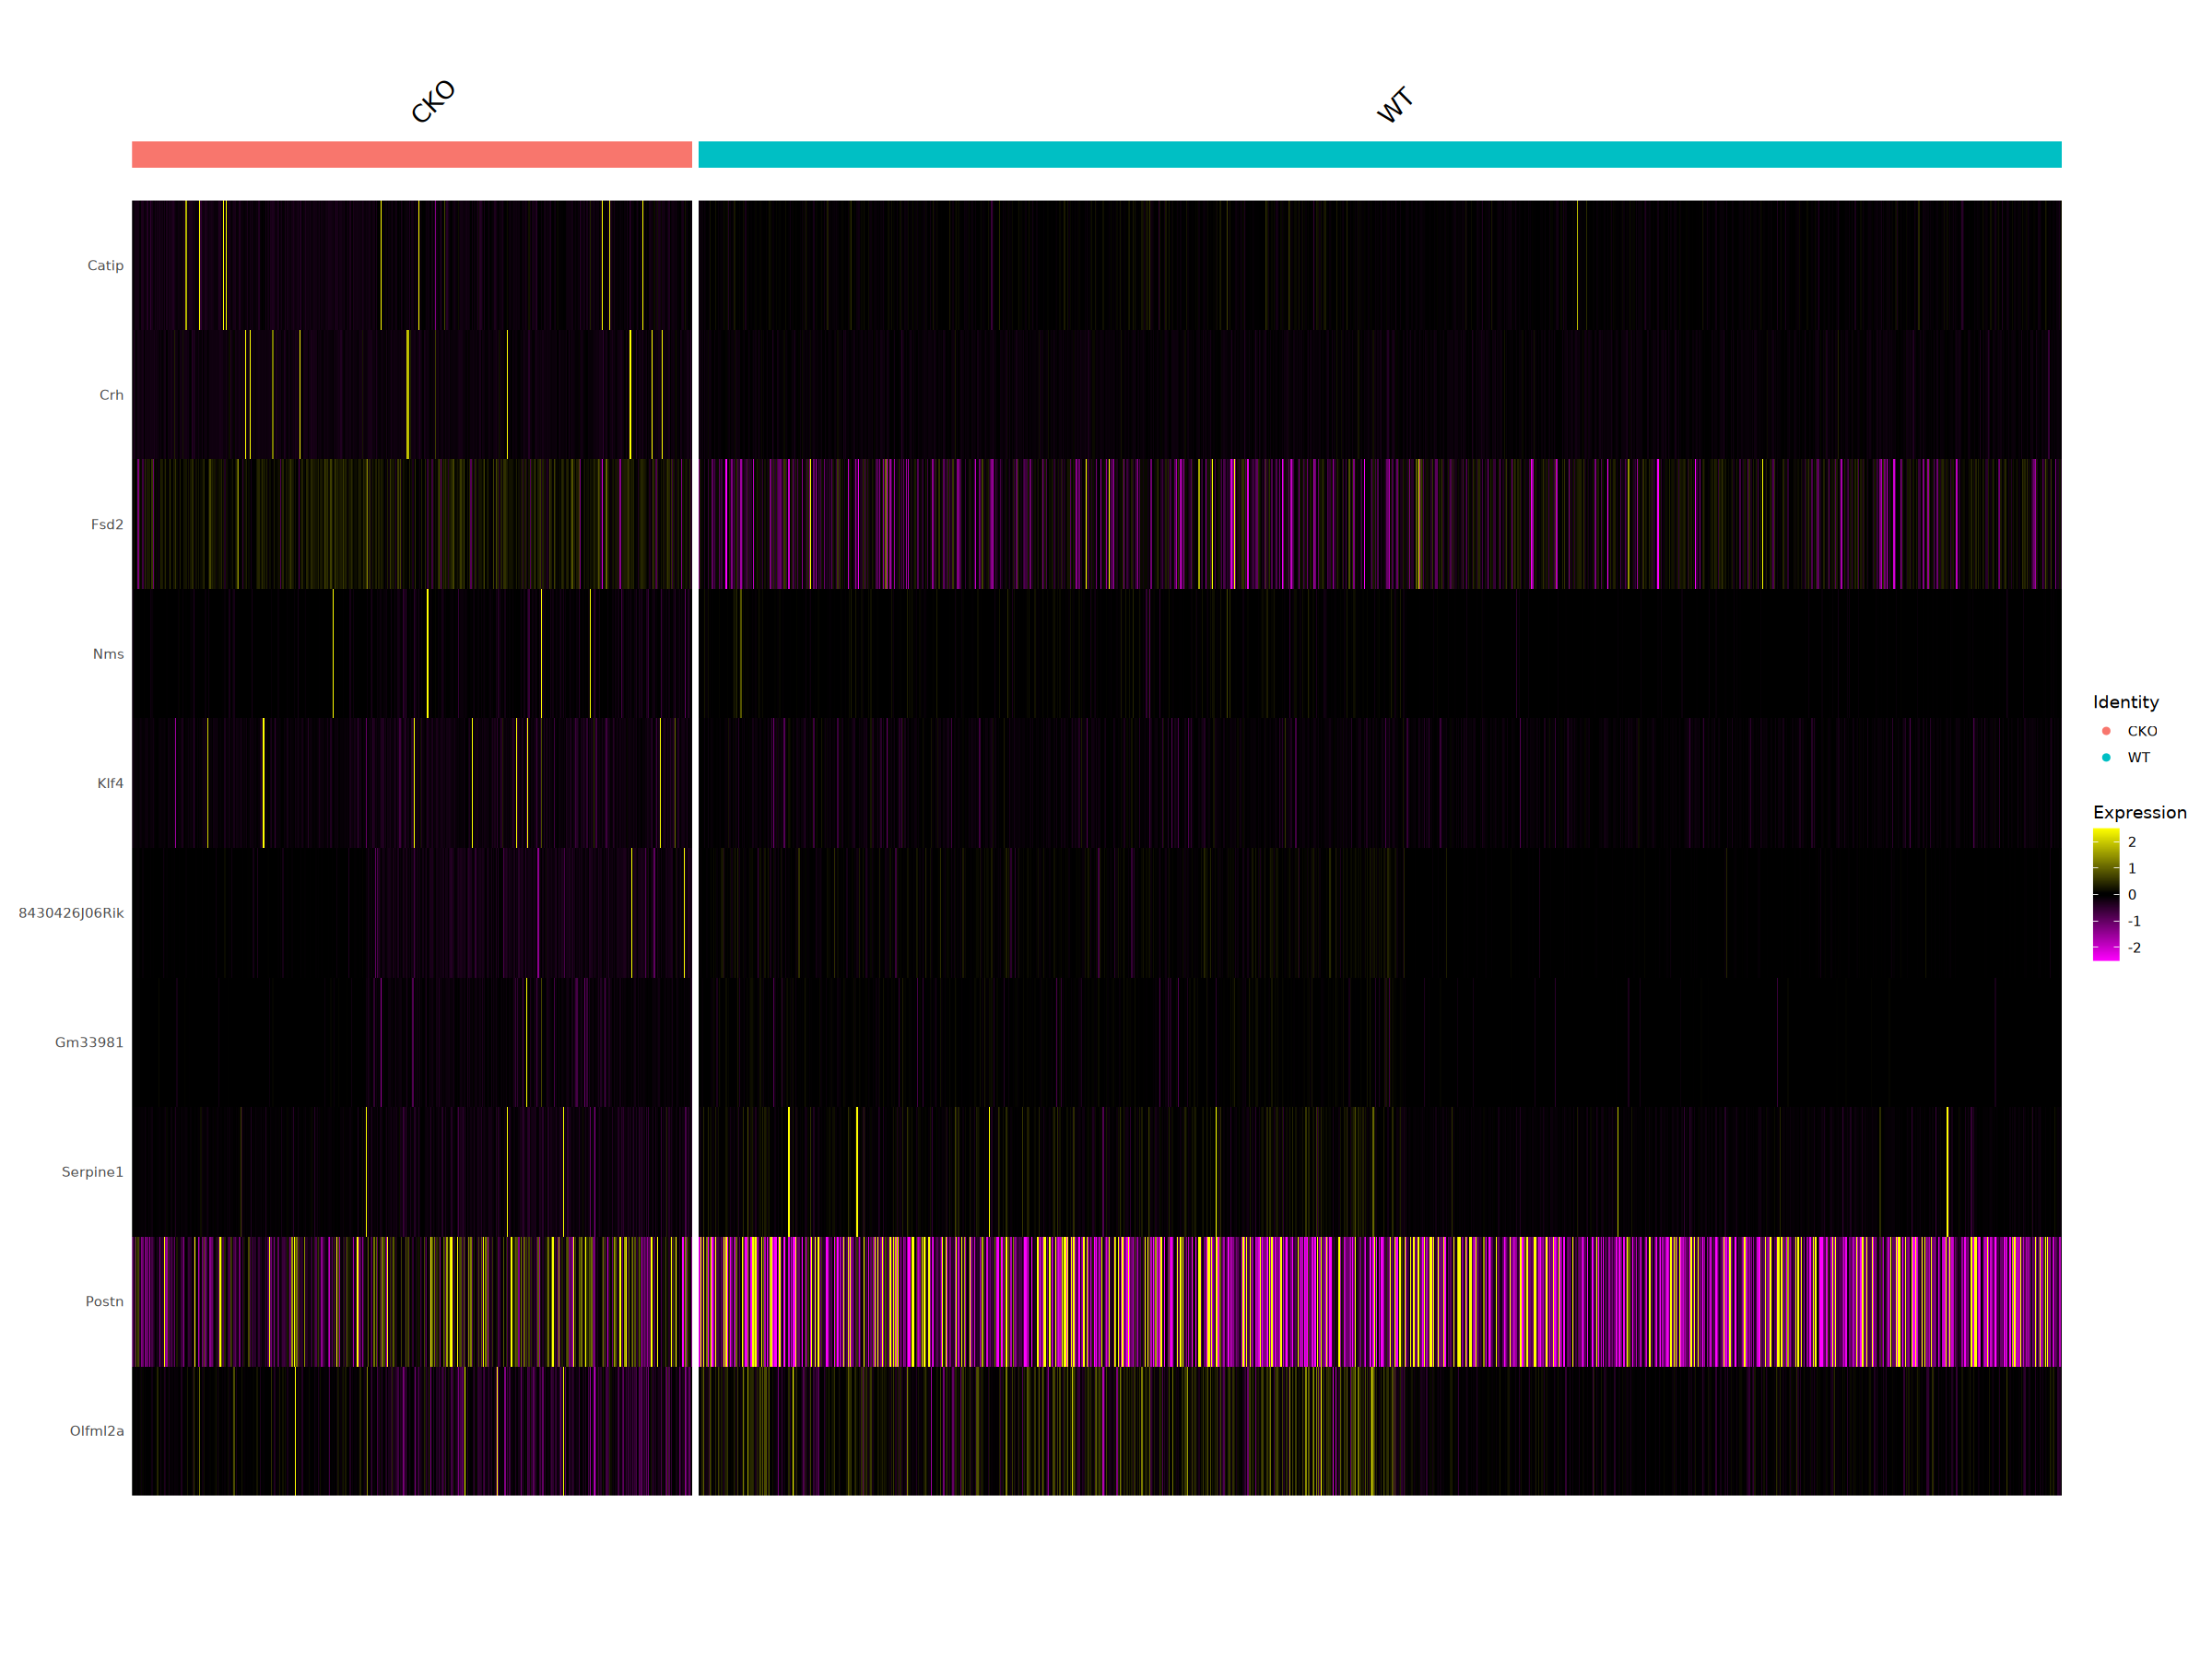

In [19]:
options(repr.plot.width=20, repr.plot.height=15)
DoHeatmap(female_subset,features = c(gene_show),group.by = 'treatment')